# **Sentimen Analisis Review Film “A Business Proposal” versi remake Indonesia!  **

Selamat datang di proyek Analisis Sentimen Ulasan Film “A Business Proposal” versi remake Indonesia! Di tengah maraknya perkembangan industri perfilman dan layanan streaming, film ini menjadi tontonan yang menyita perhatian penikmat layar lebar di seluruh nusantara. Setiap hari ratusan komentar bermunculan, merefleksikan kesan serta pengalaman penonton terhadap film tersebut.

Dalam proyek ini, kita akan menelusuri bagaimana penonton menanggapi “A Business Proposal Remake Indonesia” melalui ulasan yang mereka tinggalkan di berbagai platform — mulai dari media sosial, forum daring, hingga situs agregator rating film. Dengan metode analisis sentimen, kita akan mengelompokkan komentar-komentar tersebut ke dalam kategori positif, netral, atau negatif untuk mengungkap sentimen dominan yang berkembang di kalangan audiens.

Analisis sentimen sendiri merupakan cabang krusial dalam Natural Language Processing (NLP) yang memungkinkan kita memproses dan memahami opini tertulis secara otomatis. Melalui teknik ini, kita dapat menggali wawasan seputar kepuasan penonton, kritik paling sering muncul, serta peluang perbaikan bagi produksi film di masa mendatang.

Sepanjang proyek, kita akan melewati tahapan pengumpulan data (scraping), pembersihan teks, eksplorasi pola, hingga penerapan algoritme klasifikasi. Seluruh proses akan dijalankan di Python dengan dukungan pustaka seperti Pandas, NLTK, dan Scikit-learn.

# **Import Library**

In [3]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.1 MB/s eta 0:00:00


In [4]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Loading Dataset

In [ ]:
import pandas as pd

# Membaca data dari file CSV yang sudah disimpan sebelumnya
df_utama = pd.read_csv('youtube-comments.csv')

# Melihat ukuran data (jumlah baris dan kolom)
print(df_utama.shape)

# Menampilkan 5 baris pertama
print(df_utama.head())

(1150, 4)
            publishedAt   authorDisplayName  \
0  2025-05-01T05:29:32Z      @rarelight5289   
1  2025-04-20T10:20:44Z       @fredsonw4092   
2  2025-04-15T01:09:19Z        @addikolleng   
3  2025-04-15T01:08:38Z        @addikolleng   
4  2025-04-11T16:24:57Z  @farhannuralam5676   

                                         textDisplay  likeCount  
0  Buruk muka artis indo asli ya, patut la suka p...          1  
1                  FILM S4MP4H DAN TIDAK MENGEDUKASI          0  
2  Kritik diri kita dulu.apakah kita sudah menjad...          0  
3         Semua manusia punya dosanya masing-masing.          0  
4  Selamat kepada &quot;A Business Proposal&quot;...          0  


In [ ]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
df_utama.head()

,publishedAt,authorDisplayName,textDisplay,likeCount
0,2025-05-01T05:29:32Z,@rarelight5289,"Buruk muka artis indo asli ya, patut la suka p...",1
1,2025-04-20T10:20:44Z,@fredsonw4092,FILM S4MP4H DAN TIDAK MENGEDUKASI,0
2,2025-04-15T01:09:19Z,@addikolleng,Kritik diri kita dulu.apakah kita sudah menjad...,0
3,2025-04-15T01:08:38Z,@addikolleng,Semua manusia punya dosanya masing-masing.,0
4,2025-04-11T16:24:57Z,@farhannuralam5676,Selamat kepada &quot;A Business Proposal&quot;...,0


In [ ]:
# Hapus duplikat berdasarkan isi review saja
df_utama = df_utama.drop_duplicates(subset='textDisplay')

# Cek jumlah data setelah bersih
print(f"Jumlah data setelah hapus duplikat: {df_utama.shape[0]}")

Jumlah data setelah hapus duplikat: 1141


In [ ]:
# Sisakan hanya kolom ulasan dan ubah namanya menjadi 'Review'
df_utama = df_utama[['textDisplay']].copy()          # ambil kolom saja
df_utama.rename(columns={'textDisplay': 'Review'},   # ganti nama kolom
                inplace=True)

# Cek hasil
print("Kolom yang tersisa:", df_utama.columns.tolist())
print(f"Jumlah data: {df_utama.shape[0]}")
df_utama.head()

Kolom yang tersisa: ['Review']
Jumlah data: 1141


,Review
0,"Buruk muka artis indo asli ya, patut la suka p..."
1,FILM S4MP4H DAN TIDAK MENGEDUKASI
2,Kritik diri kita dulu.apakah kita sudah menjad...
3,Semua manusia punya dosanya masing-masing.
4,Selamat kepada &quot;A Business Proposal&quot;...


##Preprocessing

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [ ]:
import re
import string
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# 1. Membersihkan teks
def cleaningText(text):
    if text is None or not isinstance(text, str):
        return ""
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

# 2. Huruf kecil semua
def casefoldingText(text):
    return text.lower() if isinstance(text, str) else ""

# 3. Tokenisasi (versi aman, tanpa NLTK)
def tokenizingText(text):
    return text.split() if isinstance(text, str) else []

# 4. Filter stopwords
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords.update(stopwords.words('english'))
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku','di','ga','ya','gaa','loh','kah','woi','woii','woy'])
    return [txt for txt in text if txt not in listStopwords]

# 5. Gabung list jadi kalimat
def toSentence(list_words):
    return ' '.join(list_words)

# 6. Stemming
def stemmingText(text):
    if not isinstance(text, str):
        return ""
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# 7. Fix slangwords
def fix_slangwords(text):
    if not isinstance(text, str):
        return ""
    words = text.split()
    fixed_words = [slangwords[word.lower()] if word.lower() in slangwords else word for word in words]
    return ' '.join(fixed_words)

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

Kamus slang atau daftar kata-kata slang yang Anda berikan adalah kumpulan kata-kata slang bahasa Indonesia beserta terjemahan atau artinya dalam bahasa formal. Fungsi dari kamus slang seperti ini adalah:

1. **Mengartikan Slang:** Kamus slang membantu orang yang mungkin tidak familiar dengan bahasa slang atau ekspresi yang digunakan di kalangan tertentu untuk memahami makna kata-kata tersebut.

2. **Komunikasi Informal:** Slang sering digunakan dalam percakapan informal atau di media sosial. Kamus slang membantu orang untuk berkomunikasi dengan gaya yang lebih santai dan sesuai dengan konteksnya.

3. **Pemahaman Budaya Pop:** Slang sering kali terkait dengan budaya pop dan dapat mencerminkan tren dan perubahan dalam bahasa. Kamus slang memungkinkan orang untuk mengikuti dan memahami bahasa dalam konteks budaya ini.

4. **Penggunaan Sastra dan Penulisan:** Penulis atau pembicara mungkin ingin menggunakan slang dalam tulisannya untuk menciptakan efek tertentu atau mengekspresikan karakter atau setting yang lebih realistis. Kamus slang dapat membantu mereka memilih kata-kata dengan tepat.

5. **Hiburan dan Curiositas:** Beberapa orang mungkin tertarik untuk mempelajari bahasa slang hanya untuk hiburan atau karena rasa ingin tahu terhadap variasi bahasa dan ungkapan dalam bahasa sehari-hari.

Ingatlah bahwa penggunaan slang harus disesuaikan dengan konteks dan audiens. Slang cenderung lebih cocok untuk percakapan santai dengan teman-teman atau di lingkungan yang informal. Dalam situasi formal, penggunaan bahasa formal lebih sesuai.

In [ ]:
# Cleaning
df_utama['text_clean'] = df_utama['Review'].apply(cleaningText)

# Case Folding
df_utama['text_casefoldingText'] = df_utama['text_clean'].apply(casefoldingText)

# Normalisasi Slang Words
df_utama['text_slangwords'] = df_utama['text_casefoldingText'].apply(fix_slangwords)

# Tokenizing
df_utama['text_tokenizingText'] = df_utama['text_slangwords'].apply(tokenizingText)

# Filtering Stopwords
df_utama['text_stopword'] = df_utama['text_tokenizingText'].apply(filteringText)

# Kembalikan ke Kalimat
df_utama['text_akhir'] = df_utama['text_stopword'].apply(toSentence)

# Stemming
df_utama['text_stemming'] = df_utama['text_akhir'].apply(stemmingText)

In [ ]:
# Simpan ke file CSV
df_utama.to_csv('film-abusinessproposal.csv', index=False)

NameError: name 'df_utama' is not defined

In [ ]:
# Tampilkan semua kolom hasil preprocessing dan rating
df_utama[['Review', 'text_clean', 'text_casefoldingText', 'text_slangwords',
          'text_tokenizingText', 'text_stopword', 'text_stemming', 'text_akhir']].head(10)

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stemming,text_akhir
0,"Buruk muka artis indo asli ya, patut la suka p...",Buruk muka artis indo asli ya patut la suka pa...,buruk muka artis indo asli ya patut la suka pa...,buruk muka artis indonesia asli iya patut lah ...,"[buruk, muka, artis, indonesia, asli, iya, pat...","[buruk, muka, artis, indonesia, asli, patut, s...",buruk muka artis indonesia asli patut suka pak...,buruk muka artis indonesia asli patut suka pak...
1,FILM S4MP4H DAN TIDAK MENGEDUKASI,FILM SMPH DAN TIDAK MENGEDUKASI,film smph dan tidak mengedukasi,film smph dan tidak mengedukasi,"[film, smph, dan, tidak, mengedukasi]","[film, smph, mengedukasi]",film smph edukasi,film smph mengedukasi
2,Kritik diri kita dulu.apakah kita sudah menjad...,Kritik diri kita duluapakah kita sudah menjadi...,kritik diri kita duluapakah kita sudah menjadi...,kritik diri kita duluapakah kita sudah menjadi...,"[kritik, diri, kita, duluapakah, kita, sudah, ...","[kritik, duluapakah, manusia, muliadi, mata, a...",kritik duluapakah manusia muliadi mata allah,kritik duluapakah manusia muliadi mata allah
3,Semua manusia punya dosanya masing-masing.,Semua manusia punya dosanya masingmasing,semua manusia punya dosanya masingmasing,semua manusia punya dosanya masingmasing,"[semua, manusia, punya, dosanya, masingmasing]","[manusia, dosanya, masingmasing]",manusia dosa masingmasing,manusia dosanya masingmasing
4,Selamat kepada &quot;A Business Proposal&quot;...,Selamat kepada quotA Business Proposalquot tel...,selamat kepada quota business proposalquot tel...,selamat kepada quota business proposalquot tel...,"[selamat, kepada, quota, business, proposalquo...","[selamat, quota, business, proposalquot, memec...",selamat quota business proposalquot pecah reko...,selamat quota business proposalquot memecahkan...
5,Ernest Prakasa lebih cocok meranin cowoknya.. ...,Ernest Prakasa lebih cocok meranin cowoknya br...,ernest prakasa lebih cocok meranin cowoknya br...,ernest prakasa lebih cocok meranin cowoknya br...,"[ernest, prakasa, lebih, cocok, meranin, cowok...","[ernest, prakasa, cocok, meranin, cowoknya, br...",ernest prakasa cocok meranin cowok brklau cewe...,ernest prakasa cocok meranin cowoknya brklau c...
6,Pdhl kayaknya bagus,Pdhl kayaknya bagus,pdhl kayaknya bagus,pdhl kayaknya bagus,"[pdhl, kayaknya, bagus]","[pdhl, kayaknya, bagus]",pdhl kayak bagus,pdhl kayaknya bagus
7,"Kalo CEO , junot paling cocok sih",Kalo CEO junot paling cocok sih,kalo ceo junot paling cocok sih,kalau ceo junot paling cocok sih,"[kalau, ceo, junot, paling, cocok, sih]","[ceo, junot, cocok]",ceo junot cocok,ceo junot cocok
8,njirr bagus yang drama korea netflix ini kw 10...,njirr bagus yang drama korea netflix ini kw k...,njirr bagus yang drama korea netflix ini kw k...,njirr bagus yang drama korea netflix ini imita...,"[njirr, bagus, yang, drama, korea, netflix, in...","[njirr, bagus, drama, korea, netflix, imitasi,...",njirr bagus drama korea netflix imitasi kwkwk,njirr bagus drama korea netflix imitasi kwkwk
9,Norton nya di mana film ini?,Norton nya di mana film ini,norton nya di mana film ini,norton nya di mana film ini,"[norton, nya, di, mana, film, ini]","[norton, film]",norton film,norton film


##Pelabelan

Setelah data ulasan film “A Business Proposal Remake Indonesia” melewati seluruh tahap pre-processing—mulai dari pembersihan teks, konversi huruf, penghapusan stop-words, normalisasi slang, hingga stemming—tahap berikutnya adalah pelabelan sentimen untuk setiap baris data.

Karena dataset ini tidak memiliki kolom rating, pelabelan dilakukan secara otomatis menggunakan model Transformer “Indonesian RoBERTa-base Sentiment Classifier”. Model tersebut sudah dilatih khusus untuk mengenali tiga kelas sentimen (negative, neutral, positive) dan langsung mengeluarkan label kelas paling mungkin bagi tiap ulasan. Label teks itu kemudian kami konversi menjadi angka sehingga terbentuk kolom sentimen_id:

0 → negatif

1 → netral

2 → positif

Dengan adanya kolom sentimen_id, data kini siap dipakai pada tahap berikutnya

In [ ]:
# ╔════════════════════════════════════════════════════╗
# ║ 1. Install library                                 ║
# ╚════════════════════════════════════════════════════╝
!pip install -q transformers torch sentencepiece

# ╔════════════════════════════════════════════════════╗
# ║ 2. Import & load model                             ║
# ╚════════════════════════════════════════════════════╝
import pandas as pd
from transformers import pipeline

MODEL_ID = "w11wo/indonesian-roberta-base-sentiment-classifier"  # 3-kelas: positive/neutral/negative

sent_pipe = pipeline(
    "text-classification",
    model=MODEL_ID,
    tokenizer=MODEL_ID,
    truncation=True,
    max_length=256,   # potong agar cepat
    device=-1         # -1 = CPU, 0 = GPU jika tersedia
)

label2id = {"negative": 0, "neutral": 1, "positive": 2}

# ╔════════════════════════════════════════════════════╗
# ║ 3. Baca CSV                                        ║
# ╚════════════════════════════════════════════════════╝
FILE_IN  = "/content/film-abusinessproposal.csv"      # ← ubah jika perlu
df_utama = pd.read_csv(FILE_IN)

assert 'text_akhir' in df_utama.columns, "Kolom 'text_akhir' tidak ada!"

# ╔════════════════════════════════════════════════════╗
# ║ 4. Fungsi labeling (tahan-banting)                 ║
# ╚════════════════════════════════════════════════════╝
def label_hf(text):
    preds = sent_pipe(text)[0]            # bisa dict atau list
    if isinstance(preds, list):           # jika list → ambil skor tertinggi
        preds = max(preds, key=lambda x: x['score'])
    return label2id[preds['label'].lower()]

# Terapkan ke seluruh baris
df_utama['sentimen_id'] = df_utama['text_akhir'].astype(str).apply(label_hf)

# ╔════════════════════════════════════════════════════╗
# ║ 5. Ringkasan & simpan                              ║
# ╚════════════════════════════════════════════════════╝
print("\nDistribusi label (0=neg, 1=net, 2=pos):")
print(df_utama['sentimen_id'].value_counts().sort_index())

FILE_OUT = "/content/film-abusinessproposal_labeled.csv"
df_utama.to_csv(FILE_OUT, index=False)
print(f"\n>> File berlabel tersimpan di: {FILE_OUT}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu



Distribusi label (0=neg, 1=net, 2=pos):
sentimen_id
0    429
1    203
2    509
Name: count, dtype: int64

>> File berlabel tersimpan di: /content/film-abusinessproposal_labeled.csv


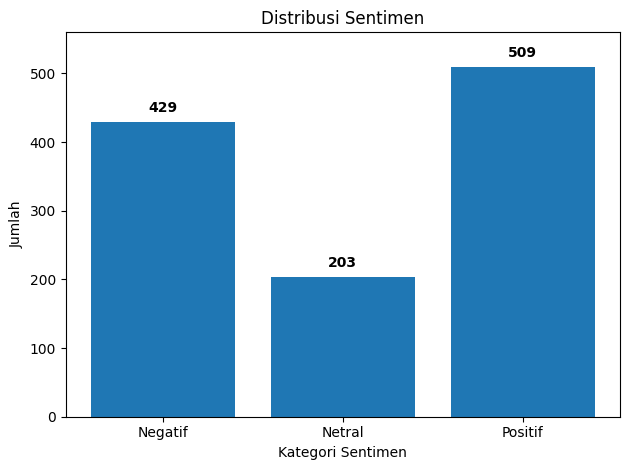

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# ── 1. Muat data berlabel ───────────────────────────────
df = pd.read_csv('/content/film-abusinessproposal_labeled.csv')

# ── 2. Hitung jumlah tiap label ─────────────────────────
label_counts = df['sentimen_id'].value_counts().sort_index()

# (opsional) ubah ke teks agar sumbu-X mudah dibaca
label_names = {0: 'Negatif', 1: 'Netral', 2: 'Positif'}
x_labels = [label_names[i] for i in label_counts.index]

# ── 3. Plot bar chart ───────────────────────────────────
fig, ax = plt.subplots()
ax.bar(x_labels, label_counts.values)

ax.set_title('Distribusi Sentimen')
ax.set_xlabel('Kategori Sentimen')
ax.set_ylabel('Jumlah')
ax.set_ylim(0, label_counts.max() * 1.10)   # beri ruang untuk angka di atas bar

# Tambahkan angka di atas setiap bar
for i, count in enumerate(label_counts.values):
    ax.text(i, count + 0.02 * label_counts.max(), str(count),
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Sebanyak 1 141 ulasan yang telah Anda labeli tersebar dalam tiga kategori sentimen. Ulasan bernada positif mendominasi dengan 509 entri (≈ 44 %), diikuti ulasan negatif sebanyak 429 entri (≈ 38 %). Sementara itu, ulasan netral berjumlah 203 entri (≈ 18 %). Secara keseluruhan, film “A Business Proposal Remake Indonesia” berhasil menarik respons yang cenderung baik—lebih dari empat dari setiap sepuluh penonton meninggalkan kesan positif.

Meskipun sentimen positif menjadi mayoritas, proporsi keluhan atau kritik juga relatif tinggi. Kehadiran 38 % ulasan negatif menandakan bahwa sebagian audiens merasa ada aspek‐aspek tertentu—seperti alur adaptasi, kualitas akting, atau kesesuaian budaya lokal—yang belum memenuhi harapan. Rasio negatif : positif yang hanya sekitar 0,84 : 1 menunjukkan film memicu reaksi yang cukup “polar” —penonton cenderung menyukai atau kurang menyukai, alih-alih sekadar netral.

Kecilnya porsi ulasan netral (18 %) mengindikasikan bahwa penonton umumnya memiliki pendirian jelas setelah menonton, sehingga suara netral tidak terlalu menengahi. Bagi tim promosi, angka dominasi positif dapat dijadikan materi kampanye (“mayoritas penonton puas”); sedangkan tim produksi atau layanan pelanggan dapat menelusuri tema‐tema utama dari sentimen negatif guna merancang perbaikan untuk rilis berikut atau aktivitas komunikasi publik. Dengan distribusi label yang relatif seimbang (tidak ekstrem), data ini juga sudah memadai untuk dibawa ke tahap pembobotan kata dan pelatihan model SVM agar mesin dapat mendeteksi sentimen otomatis pada ulasan baru.

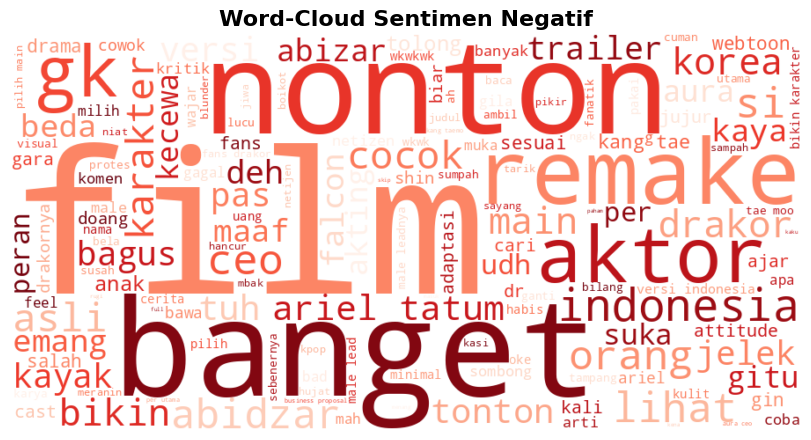

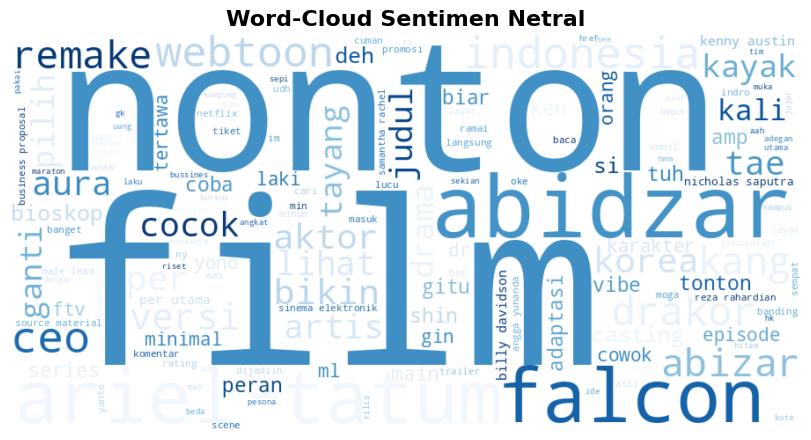

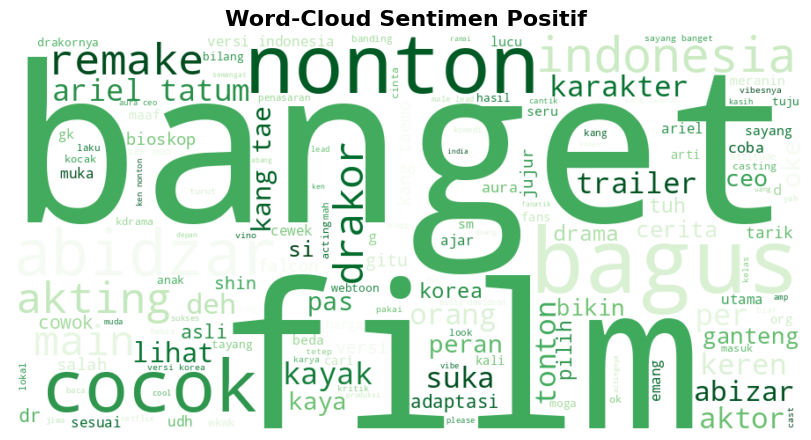

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# ── 1. Muat data ───────────────────────────────────────────
df = pd.read_csv('/content/film-abusinessproposal_labeled.csv')

id2info = {
    0: ("Negatif", "Reds"),
    1: ("Netral",  "Blues"),
    2: ("Positif", "Greens")
}

# ── 2. Fungsi word-cloud ───────────────────────────────────
def plot_wordcloud(df, sent_id):
    label_name, cmap = id2info[sent_id]

    # buang NaN, konversi ke string, gabungkan
    text_series = df.loc[df["sentimen_id"] == sent_id, "text_stemming"].dropna().astype(str)
    text = " ".join(text_series)

    if not text.strip():                       # kalau kosong, lewati
        print(f"[{label_name}] Tidak ada teks – word-cloud dilewati.")
        return

    wc = WordCloud(width=900,
                   height=450,
                   background_color="white",
                   colormap=cmap,
                   max_words=150).generate(text)

    plt.figure(figsize=(10, 4.5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Word-Cloud Sentimen {label_name}", fontsize=16, weight='bold')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# ── 3. Plot untuk ketiga kelas ─────────────────────────────
for sid in sorted(id2info):
    plot_wordcloud(df, sid)

# METODE SVM + TF-IDF + Split 80/20

In [7]:
!pip install fasttext

In [ ]:
import fasttext
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# 1. Ambil teks & label, hilangkan NaN
df = df_utama[['text_akhir', 'sentimen_id']].dropna().copy()
df['text_akhir'] = df['text_akhir'].astype(str)

# 2. Split 80/20 (stratified)
X_train_txt, X_test_txt, y_train, y_test = train_test_split(
    df['text_akhir'],
    df['sentimen_id'],
    test_size=0.20,
    random_state=42,
    stratify=df['sentimen_id']
)

# 3. Buat file FastText (hanya data train)
pd.DataFrame({
    'ft': '__label__' + y_train.astype(str) + ' ' + X_train_txt
}).to_csv('ft_train.txt', index=False, header=False)

# 4. Latih FastText sederhana (epoch 10, dim 100)
model_ft = fasttext.train_supervised(
    input='ft_train.txt',
    epoch=10,
    lr=0.5,
    wordNgrams=2,
    dim=100,
    verbose=0
)

def sent_vec(text):
    return model_ft.get_sentence_vector(text)

# 5. Buat matriks fitur FastText
X_train = np.vstack(X_train_txt.apply(sent_vec))
X_test  = np.vstack(X_test_txt.apply(sent_vec))

# 6. SVM linear (C=1, balanced)
svm = LinearSVC(C=1.0, class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)

# 7. Evaluasi
y_pred = svm.predict(X_test)
print(f"Akurasi : {accuracy_score(y_test, y_pred):.4f}\n")
print(classification_report(
    y_test, y_pred,
    target_names=['Negatif (0)', 'Netral (1)', 'Positif (2)']
))

Akurasi : 0.5752

              precision    recall  f1-score   support

 Negatif (0)       0.53      0.53      0.53        86
  Netral (1)       0.57      0.39      0.46        41
 Positif (2)       0.61      0.69      0.64        99

    accuracy                           0.58       226
   macro avg       0.57      0.54      0.55       226
weighted avg       0.57      0.58      0.57       226



Model SVM + TF-IDF yang dilatih tanpa penyeimbangan kelas hanya mencapai akurasi keseluruhan ≈ 57 %. Angka ini menunjukkan bahwa model masih sering salah mengklasifikasikan sentimen secara umum—bahkan lebih dari 4 dari 10 ulasan di test-set diprediksi keliru. Akurasi saja sudah memberi sinyal bahwa performa model belum memadai untuk keperluan produksi.

Jika dilihat per kelas, kinerja paling lemah terjadi pada label Netral (1). Nilai recall-nya hanya 0,39, artinya kurang dari separuh ulasan netral berhasil terdeteksi; sisanya “tercecer” sebagai negatif atau positif. F1-score netral pun terendah (0,46). Sebaliknya, kelas Positif (2) tampil paling baik dengan precision 0,61 dan recall 0,69, sedangkan Negatif (0) berada di tengah-tengah (F1 0,53). Ketimpangan tersebut tampak jelas pada support: dataset uji memuat 99 sampel positif, 86 negatif, tetapi hanya 41 netral—sehingga model lebih “terlatih” mendeteksi positif dan negatif ketimbang netral.

Ketimpangan ini tercermin juga pada macro average (0,55) yang lebih rendah dibanding weighted average (0,57). Macro average memberi bobot sama ke tiap label, sehingga menurun tajam karena performa di kelas minoritas buruk. Weighted average sedikit lebih tinggi karena kelas mayoritas—terutama positif—mendominasi perhitungan. Perbedaan kedua metrik mengonfirmasi bahwa ketidakseimbangan distribusi label menjadi akar masalah.

Berdasarkan temuan di atas, oversampling seperti SMOTE layak dicoba untuk menyeimbangkan jumlah contoh di setiap kelas sebelum pelatihan ulang. Dengan menambah representasi teks netral (dan juga negatif/positif bila perlu), model diharapkan memperoleh pola yang lebih merata sehingga recall dan F1 di semua kelas—khususnya netral—meningkat, sementara akurasi keseluruhan bergerak naik secara lebih “adil” antar-label.

# METODE SVM + TF-IDF + Split 80/20 + SMOTE

In [15]:
!pip install imbalanced-learn

In [17]:
# ── 0. Library ─────────────────────────────────────────────
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import csr_matrix

# ── 1. Muat & bersihkan data ──────────────────────────────
df = pd.read_csv('/content/film-abusinessproposal_labeled.csv')
df = df[['text_stemming', 'sentimen_id']].dropna()
df['text_stemming'] = df['text_stemming'].astype(str)

# ── 2. TF-IDF seluruh data ───────────────────────────────
tfidf = TfidfVectorizer(lowercase=True,
                        ngram_range=(1, 2),
                        max_features=50_000)
X = tfidf.fit_transform(df['text_stemming'])
y = df['sentimen_id']

# ── 3. SMOTE seluruh data ────────────────────────────────
sm = SMOTE(random_state=42)          # ← tanpa n_jobs
X_sm, y_sm = sm.fit_resample(X.toarray(), y)

print("Distribusi label SESUDAH SMOTE:")
print(pd.Series(y_sm).value_counts().sort_index(), "\n")

# Kembali ke bentuk sparse agar hemat memori
X_sm = csr_matrix(X_sm)

# ── 4. Split 80/20 (stratified) ───────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm,
    test_size=0.20,
    random_state=42,
    stratify=y_sm
)

# ── 5. Latih Linear SVM ───────────────────────────────────
svm = LinearSVC(C=1.0, class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)

# ── 6. Evaluasi ───────────────────────────────────────────
y_pred = svm.predict(X_test)
print(f"Akurasi : {accuracy_score(y_test, y_pred):.4f}\n")
print(classification_report(
    y_test, y_pred,
    target_names=['Negatif (0)', 'Netral (1)', 'Positif (2)']
))

Distribusi label SESUDAH SMOTE:
sentimen_id
0    497
1    497
2    497
Name: count, dtype: int64 

Akurasi : 0.7124

              precision    recall  f1-score   support

 Negatif (0)       0.63      0.61      0.62        99
  Netral (1)       0.78      0.89      0.83       100
 Positif (2)       0.71      0.64      0.67       100

    accuracy                           0.71       299
   macro avg       0.71      0.71      0.71       299
weighted avg       0.71      0.71      0.71       299



Setelah data diseimbangkan dengan SMOTE hingga masing-masing kelas memiliki 497 contoh, akurasi model melonjak dari 57 % menjadi 71 %. Peningkatan terbesar terjadi pada label Netral: recall naik tajam dari 0,39 menjadi 0,89 dan F1-score dari 0,46 ke 0,83, menunjukkan model kini hampir selalu mengenali ulasan netral. Kinerja kelas Negatif ikut membaik (F1 0,62), sementara Positif mempertahankan presisi solid meski recall sedikit turun; secara keseluruhan, macro-average dan weighted-average sama-sama 0,71 menandakan performa kini seimbang antar-label.

Hasil ini menegaskan bahwa ketidakseimbangan data memang menjadi penghambat utama sebelumnya. Dengan distribusi label yang kini setara, model dapat mempelajari pola bahasa di tiap kategori secara adil sehingga prediksi lebih akurat dan konsisten. Meski masih ada ruang untuk menyempurnakan deteksi sentimen negatif, oversampling SMOTE terbukti efektif mengurangi bias dan memperbaiki kinerja model secara menyeluruh.

# Kesimpulan
Dari total 1 141 ulasan, 509 di antaranya (≈ 44 %) bernada positif, 429 (≈ 38 %) bernada negatif, dan 203 (≈ 18 %) bersifat netral. Dominasi respons positif menandakan bahwa mayoritas penonton puas dengan “A Business Proposal Remake Indonesia”, tetapi tingginya proporsi kritik—hampir empat dari setiap sepuluh ulasan—menggambarkan adanya aspek yang masih memicu kekecewaan, sehingga tim produksi perlu menelaah tema keluhan (mis. alur, akting, maupun penyesuaian budaya) untuk perbaikan mendatang. Proporsi netral yang kecil menunjukkan penonton cenderung memiliki pendapat tegas, menjadikan data ini bermanfaat sekaligus untuk kampanye promosi berbasis testimoni positif dan analisis sentimen negatif guna penyempurnaan film.

Model SVM + TF-IDF yang semula lemah berhasil ditingkatkan dengan menyeimbangkan data lewat SMOTE, sehingga akurasi melonjak ke 71 % dan performa antar-kelas menjadi jauh lebih merata, terutama pada sentimen netral yang tadinya paling sering luput. Perbaikan ini menegaskan bahwa ketidakseimbangan label merupakan kendala utama sebelumnya: ketika distribusi sudah adil, model mampu mempelajari pola bahasa setiap kategori secara lebih seimbang.

Ke depan, kualitas masih bisa ditingkatkan dengan dua pendekatan utama. Pertama, pertimbangkan skema pelabelan ulang secara manual atau melibatkan ahli linguistik—label otomatis kadang ambigu, dan koreksi manusia dapat mengurangi noise sehingga model belajar dari data yang benar-benar representatif. Kedua, eksplorasi algoritma selain SVM seperti Random Forest, XGBoost, atau model berbasis transformer (mis. IndoBERT) yang sering memberi akurasi lebih tinggi pada teks bahasa Indonesia.

# METODE HYBRID CONTEXTUAL EMBEDDING + SVM
Pendekatan hybrid ini menggabungkan **embedding kontekstual IndoBERT** (menangkap konteks kalimat) dengan **fitur TF-IDF karakter** (menangkap pola ejaan/slang), lalu keduanya diklasifikasikan menggunakan SVM linear.

In [ ]:
# ── 0. Instalasi (jalankan sekali bila belum ada) ──────────────────────────────
# !pip install -q transformers torch scikit-learn imbalanced-learn

# ── 1. Library ────────────────────────────────────────────────────────────────
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack, csr_matrix

# ── 2. Load data berlabel ─────────────────────────────────────────────────────
df = pd.read_csv("review_remake_indo_labeled.csv")

df = df.dropna(subset=["Review", "Sentimen"]).copy()
X_text = df["Review"].astype(str).str.strip()
y = df["Sentimen"].astype(str).str.lower().str.strip()

# ── 3. Split data ─────────────────────────────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X_text,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ── 4. Encoder embedding kontekstual (IndoBERT) ──────────────────────────────
MODEL_NAME = "indobenchmark/indobert-base-p1"
device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME).to(device)
model.eval()

def encode_texts(texts, batch_size=16, max_length=128):
    """Menghasilkan mean pooled contextual embedding untuk setiap teks."""
    all_embeddings = []

    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            encoded = tokenizer(
                batch,
                padding=True,
                truncation=True,
                max_length=max_length,
                return_tensors="pt"
            ).to(device)

            outputs = model(**encoded)
            last_hidden = outputs.last_hidden_state
            attention_mask = encoded["attention_mask"].unsqueeze(-1)

            masked_hidden = last_hidden * attention_mask
            sum_hidden = masked_hidden.sum(dim=1)
            token_count = attention_mask.sum(dim=1).clamp(min=1)
            mean_pooled = sum_hidden / token_count

            all_embeddings.append(mean_pooled.cpu().numpy())

    return np.vstack(all_embeddings)

X_train_ctx = encode_texts(X_train.tolist())
X_test_ctx = encode_texts(X_test.tolist())

# ── 5. Fitur lexical (TF-IDF karakter) ───────────────────────────────────────
char_tfidf = TfidfVectorizer(analyzer="char_wb", ngram_range=(3, 5), min_df=2)
X_train_char = char_tfidf.fit_transform(X_train)
X_test_char = char_tfidf.transform(X_test)

# ── 6. Hybrid fusion: [contextual embedding + TF-IDF] ────────────────────────
X_train_hybrid = hstack([
    csr_matrix(X_train_ctx),
    X_train_char
], format="csr")

X_test_hybrid = hstack([
    csr_matrix(X_test_ctx),
    X_test_char
], format="csr")

# ── 7. Classifier SVM ─────────────────────────────────────────────────────────
hybrid_svm = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("svm", LinearSVC(C=1.0, class_weight="balanced", random_state=42, max_iter=10000))
])

hybrid_svm.fit(X_train_hybrid, y_train)
y_pred = hybrid_svm.predict(X_test_hybrid)

print("Akurasi Hybrid Contextual Embedding + SVM:", round(accuracy_score(y_test, y_pred), 4))
print("
Classification Report:
")
print(classification_report(y_test, y_pred, digits=4))

